# Machine Learning intensive
## USD/RUB exchnage rate and Oil Brent price correlation

In [425]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [426]:
#Set common plot values
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(12,6)}
        )
pd.options.plotting.backend = "plotly"

In [427]:
# USD rate import
usd_rate = pd.read_excel(r'D:\Studies\Skillbox\RC_F01_03_2017_T01_03_2021.xlsx')
usd_rate.drop(columns=['nominal', 'cdx'], inplace=True)
usd_rate.rename(columns={'data':'date'}, inplace=True)

In [428]:
# Oil Brent price import
brent = pd.read_excel(r'D:\Studies\Skillbox\RBRTEd.xls', sheet_name=1, skiprows=2, names=["date", "price"])

In [435]:
#combining dataframes
df = usd_rate.set_index("date").join(brent.set_index("date"))

In [437]:
# Check for missing values
df[df.price.isnull()]

,curs,price
date,,
2017-03-04,58.9099,NaN
2017-03-11,59.2174,NaN
2017-03-18,57.9344,NaN
2017-03-25,57.4247,NaN
2017-04-01,55.9606,NaN
...,...,...
2021-02-06,75.1107,NaN
2021-02-13,73.9378,NaN
2021-02-20,73.9717,NaN


In [438]:
# Fill missing values with previous values
df = df.fillna(method="ffill") \
    .reset_index()

In [440]:
# Exploratory analysis - correlation Oil Brent price and USD /RUN exchnage rate
px.line(df, x='date', y=['curs', 'price'], labels={'variable':'lines'})

In [441]:
# Adding additional columns
df["weekday"]   = df.date.dt.weekday
df["month"]     = df.date.dt.month
df["year"]      = df.date.dt.year

In [443]:
# Adding columsn for the last 7 days
past_days = 7

for day in range(past_days):
  d = day+1
  df[f"curs_back_{d}d"] = df["curs"].shift(d)
  df[f"oil_back_{d}d"] = df["price"].shift(d)

In [444]:
df.head()

,date,curs,price,weekday,month,year,curs_back_1d,oil_back_1d,curs_back_2d,oil_back_2d,curs_back_3d,oil_back_3d,curs_back_4d,oil_back_4d,curs_back_5d,oil_back_5d,curs_back_6d,oil_back_6d,curs_back_7d,oil_back_7d
0,2017-03-01,57.9627,55.72,2,3,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-02,58.3776,54.16,3,3,2017,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-03,58.4067,54.12,4,3,2017,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-03-04,58.9099,54.12,5,3,2017,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-07,58.3370,54.61,1,3,2017,58.9099,54.12,58.4067,54.12,58.3776,54.16,57.9627,55.72,NaN,NaN,NaN,NaN,NaN,NaN


In [445]:
# Adding columns with the median value for the dollar exchange rate with a moving average of 8 days and an average of oil price with a moving average of 42 days
df["usd_8d"] = df["curs"].shift(1).rolling(window=8).median()
df["oil_42d"] = df["price"].shift(1).rolling(window=42).mean()

df.dropna(inplace=True)

In [448]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=["year", "month", "weekday"])
df.drop(["date", "price"], axis=1, inplace=True)

In [450]:
# Set target и features datasets
X = df.drop("curs", axis=1)
y = df["curs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

## Machine Learning models

### Linear Regression

In [453]:

model = LinearRegression()

model.fit(X_train,y_train)
prediction = model.predict(X_test)

mae_lin_reg = mean_absolute_error(y_test, prediction)
max_lin_reg = max_error(y_test, prediction)

print("MAE", mae_lin_reg)
print("MAX", max_lin_reg)

MAE 0.3831082061731031
MAX 4.096095755763926


### Random Forest Regressor

In [454]:
model = RandomForestRegressor(n_estimators=200, random_state=42, criterion="mae")

model.fit(X_train,y_train)
prediction = model.predict(X_test)

mae_lin_reg = mean_absolute_error(y_test, prediction)
max_lin_reg = max_error(y_test, prediction)

print("MAE", mae_lin_reg)
print("MAX", max_lin_reg)

MAE 0.39867621864951136
MAX 4.417452500000053


### K Neighbors Regressor

In [455]:
model = KNeighborsRegressor(n_neighbors=2)

model.fit(X_train,y_train)
prediction = model.predict(X_test)

mae_kn_reg = mean_absolute_error(y_test, prediction)
max_kn_reg = max_error(y_test, prediction)

print("MAE", mae_kn_reg)
print("MAX", max_kn_reg)

MAE 0.3872681672025724
MAX 3.5011499999999955


## Task 1
Use MLPRegressor model and change its settings to get error (mae) less than presented.

In [456]:
model_MLPR = MLPRegressor(hidden_layer_sizes=(100,100,100),
                        learning_rate_init=0.001,
                        random_state=42
                        )
model_MLPR.fit(X_train, y_train)
prediction = model_MLPR.predict(X_test)

mae_MLPR = mean_absolute_error(y_test, prediction)
max_MLPR = max_error(y_test, prediction)

print("MAE", mae_MLPR)
print("MAX", max_MLPR)


MAE 0.5808345711185958
MAX 3.333393767749598
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



The resulting error is less than that which was taught in the lesson both in terms of the average absolute error and in terms of the maximum deviation

In [457]:
# Comparing predicted values with real data
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': prediction}).reset_index().drop(columns='index')
df_result.head()

,Actual,Predicted
0,68.2737,67.956155
1,65.5698,66.736692
2,77.2855,77.715919
3,65.7476,66.058657
4,57.4437,57.524401


In [458]:
# Plot for comparing predicted values with real data with a 10-day moving average
px.line(df_result.rolling(10).mean(), y=['Actual', 'Predicted'], width=1000, height=500)

## task 2 
Try using three other regression models from sklearn (which we haven't tried yet) and tweak them to get as little error as possible

### Support Vector Regression (SVR)

In [459]:
model = SVR(kernel = 'linear')

model.fit(X_train,y_train)
prediction = model.predict(X_test)

mae_SVR = mean_absolute_error(y_test, prediction)
max_SVR = max_error(y_test, prediction)

print("MAE", mae_SVR)
print("MAX", max_SVR)

MAE 0.3677912098330049
MAX 4.331133301790871


Text(0.5, 1.0, 'Residual plot in Support Vector Regression')

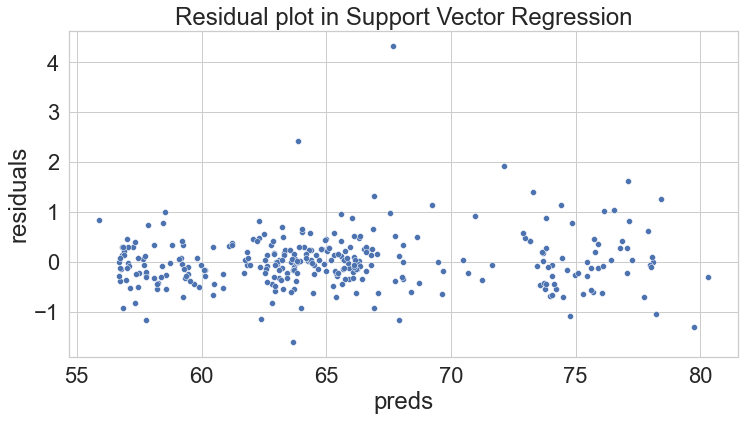

In [460]:
preds = pd.DataFrame({"preds":prediction, "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
sns.scatterplot(x = "preds", y = "residuals", data=preds)
plt.title("Residual plot in Support Vector Regression")

### Ridge Regression

In [461]:
model = linear_model.Ridge(random_state=42, solver='saga')

model.fit(X_train,y_train)
prediction = model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, prediction)
max_ridge = max_error(y_test, prediction)

print("MAE", mae_ridge)
print("MAX", max_ridge)

MAE 0.38283096131427663
MAX 4.350797083373195


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

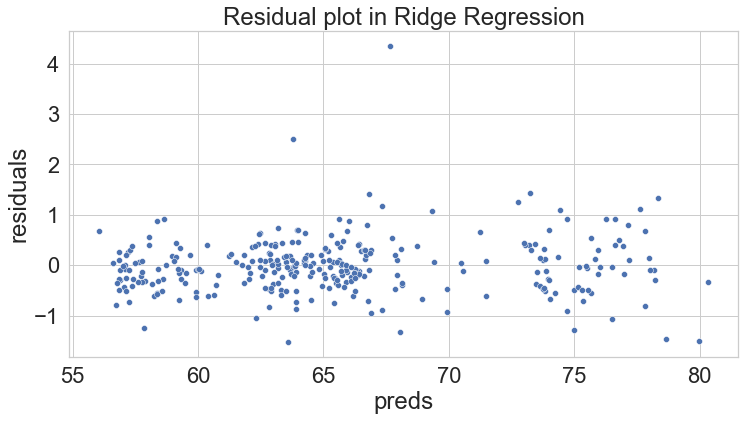

In [462]:
preds = pd.DataFrame({"preds":prediction, "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
sns.scatterplot(x = "preds", y = "residuals", data=preds)
plt.title("Residual plot in Ridge Regression")

### Bayesian Regression

In [463]:
model = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

model.fit(X_train,y_train)
prediction = model.predict(X_test)

mae_bae_ridge = mean_absolute_error(y_test, prediction)
max_bae_ridge = max_error(y_test, prediction)

print("MAE", mae_bae_ridge)
print("MAX", max_bae_ridge)

MAE 0.38310818010775805
MAX 4.205387774284532


Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

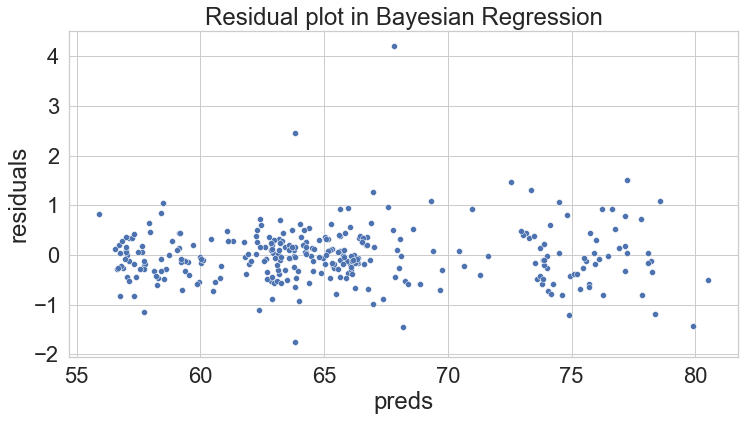

In [464]:
preds = pd.DataFrame({"preds":prediction, "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
sns.scatterplot(x = "preds", y = "residuals", data=preds)
plt.title("Residual plot in Bayesian Regression")

### Task 5 
### Comparison of mae and max indices for the used models

In [465]:
mae_total = [mae_bae_ridge, mae_kn_reg, mae_lin_reg, mae_ridge, mae_SVR, mae_MLPR]
max_total = [max_bae_ridge, max_kn_reg, max_lin_reg, max_ridge, max_SVR, max_MLPR]

col = {'Mean absolute error':mae_total,'Max Error':max_total}
models = ['Bayesian Regression','K Neighbors Regressor', 'Linear Regression','Ridge Regression','Support Vector Regression', 'MLPRegressor']
total = pd.DataFrame(data=col,index=models)
total.sort_values('Mean absolute error')

,Mean absolute error,Max Error
Support Vector Regression,0.367791,4.331133
Ridge Regression,0.382831,4.350797
Bayesian Regression,0.383108,4.205388
K Neighbors Regressor,0.387268,3.501150
Linear Regression,0.398676,4.417453
MLPRegressor,0.580835,3.333394


In [466]:
# total.sort_values('Max Error', ascending=False) \
#     .plot(kind='bar', barmode = 'group', labels={'index':'models', 'variable':'Error Type'})
px.bar(total.sort_values('Max Error'), y=['Max Error'])

Model K Neighbors Regressor shows minimum Maximum Error

In [467]:
px.bar(total.sort_values('Mean absolute error'), y=['Mean absolute error'])

SVR model shows minimum MAE

## Try to take a different number of days for predictions, we used 7 days, what if we change this number?

### Use linear regression модель

In [468]:
model = LinearRegression()

model.fit(X_train,y_train)
prediction = model.predict(X_test)

mae_lin_reg = mean_absolute_error(y_test, prediction)
max_lin_reg = max_error(y_test, prediction)

print(" Original MAE", round(mae_lin_reg,3))
print(" Original MAX", round(max_lin_reg,3))

 Original MAE 0.383
 Original MAX 4.096


### Set the function for future use

In [469]:
def days(days):

    df = usd_rate.set_index("date").join(brent.set_index("date")) \
        .fillna(method="ffill") \
        .reset_index()

    df["weekday"]   = df.date.dt.weekday
    df["month"]     = df.date.dt.month
    df["year"]      = df.date.dt.year

    # Adding columns for the last 7 days
    past_days = days

    for day in range(past_days):
        d = day+1
        df[f"curs_back_{d}d"] = df["curs"].shift(d)
        df[f"oil_back_{d}d"] = df["price"].shift(d)

    df.dropna(inplace=True)

    # Adding columns with the average and median values for the dollar rate and oil price, respectively
    df["usd_8d"] = df["curs"].shift(1).rolling(window=8).median()
    df["oil_42d"] = df["price"].shift(1).rolling(window=42).mean()

    df.dropna(inplace=True)

    # Converting categorical variables into dummy / indicator variables
    df = pd.get_dummies(df, columns=["year", "month", "weekday"])
    df.drop(["date", "price"], axis=1, inplace=True)

    # setting target and features datasets
    X = df.drop("curs", axis=1)
    y = df["curs"]

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

    model = LinearRegression()

    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    mae_lin_reg = mean_absolute_error(y_test, prediction)
    max_lin_reg = max_error(y_test, prediction)

    return round(mae_lin_reg,3)

In [470]:
# Create a series of 50 days and calculate the error for each day

days_df = {}

for day in range(50):
    days_df[day] = days(day)

In [471]:
# Convert to dataframe
days_mae = pd.DataFrame(list(days_df.items()),columns = ['Day','MAE']) 

In [472]:
px.line(days_mae.MAE)

The graph shows that the breakdown of the columns by day does not give a significant increase in the quality of the model starting from day 3 to day 20. A further increase in the number of days leads to overplotting and the model and increases the error

# Conclusions

The task was to find the relationship between the dollar exchange rate and the price of Brent oil. <br>
A comparative analysis was carried out and new features were added to improve the quality of the model, including columns with the median value for the dollar exchange rate with a moving average of 8 days and an average of oil price with a moving average of 42 days. <br>
Columns for the last 7 days have also been added

The following models have been developed to predict the dollar exchange rate:
- Bayesian Regression
- K Neighbors Regressor
- Linear Regression
- Ridge Regression
- Support Vector Regression
- MLPRegressor

A comparative analysis of the models was carried out for the average absolute prediction error

In [473]:
total.sort_values('Mean absolute error')

,Mean absolute error,Max Error
Support Vector Regression,0.367791,4.331133
Ridge Regression,0.382831,4.350797
Bayesian Regression,0.383108,4.205388
K Neighbors Regressor,0.387268,3.501150
Linear Regression,0.398676,4.417453
MLPRegressor,0.580835,3.333394


- Model K Neighbors Regressor showed the minimum maximum error with the current parameters
- SVR model, in turn, showed the minimum average maximum error

It can also be emphasized that at the current date of the set, all models used, with the exception of MLPRegressor, show similar values ​​for both indicators. <br> As a rule, this is associated with a small amount of input data, since deep learning shows better results compared to traditional models on large amounts of data. <br> It should also be taken into account that the dataset used to create the model was not subjected to additional necessary processing, like Anomaly / Change detection and sampling methods for further normalization of the dataset. For further preprocessing of the dataset, it is also recommended to consider the possibility of using bagging and boosting methods.



A comparative analysis of the effect of additional columns with shifted data by day was also carried out in the range of 1-50 days. <br>
The analysis showed that the breakdown of the columns by day does not give a significant increase in the quality of the model starting from day 3 to day 20. A further increase in the number of days leads to an overplot of the model and increases the error